In this notebook, we are exploring the image data and learning how to use OpenCV. Some of the basics image processing topics covered here are image resizing, color channel historgram, image smoothing, edge detection and Hougn line detection.

## Import libraries 

In [1]:
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from skimage.feature import hog
import pandas as pd

## Simple Image processing

In [2]:
# opencv read as BGR, instead of RGB. So convert
img = cv2.imread('Parking Lot/lot3.tif', 1)
RGBimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Our image has the shape: (3724, 3724, 3)


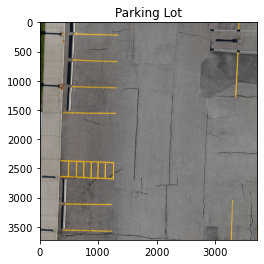

In [3]:
# plot the parking lot image
plt.imshow(RGBimg)
plt.title('Parking Lot');
print("Our image has the shape: {}".format(RGBimg.shape))

In [4]:
# check the shape of RGBimg
RGBimg.shape

(3724, 3724, 3)

In [5]:
# check the size of RGBimg
RGBimg.size

41604528

In [6]:
# check the data type of RGBimg
RGBimg.dtype

dtype('uint8')

In [7]:
# split RGBimg into different color channels 
r, g, b = cv2.split(RGBimg)

In [8]:
# combine these three channels back as an image
RGBimg_2 = cv2.merge((r,g,b))

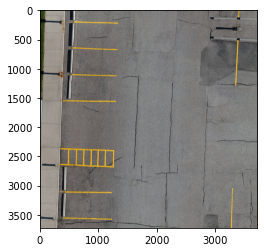

In [9]:
# check it looks the same as before 
plt.imshow(RGBimg_2)
plt.show()

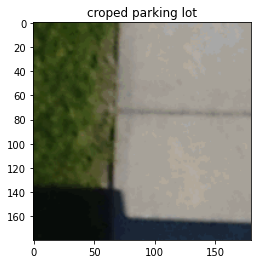

In [10]:
# crop the imgae 
img_cropped = RGBimg[20:200,20:200]
plt.imshow(img_cropped)
plt.title('croped parking lot');
plt.show()

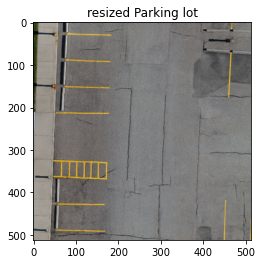

In [11]:
# orignal parking lot image is too big, lets resize it
img_resized = cv2.resize(RGBimg, (512,512))
plt.imshow(img_resized)
plt.title('resized Parking lot');
plt.show()

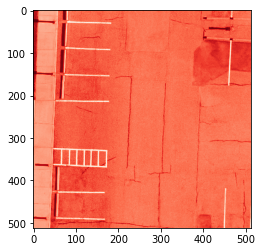

In [12]:
# plot the red channel
plt.imshow(img_resized[:,:,0], cmap=plt.cm.Reds_r)
plt.show()

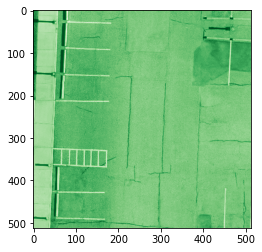

In [13]:
# plot the green channel
plt.imshow(img_resized[:,:,1], cmap=plt.cm.Greens_r)
plt.show()

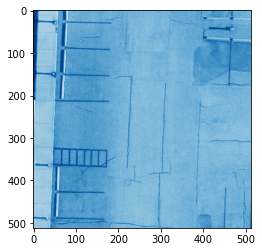

In [14]:
# plot the blue channel
plt.imshow(img_resized[:,:,2], cmap=plt.cm.Blues_r)
plt.show()

In [15]:
# save the resized image 
BGR_resized = cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR)
cv2.imwrite('resized_lot3.png',BGR_resized)    

True

## Plot histograms

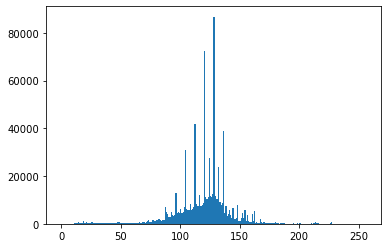

In [16]:
# histogram for the overall image
plt.hist(img_resized.ravel(),256,[0,256]); 
plt.show()

In [17]:
# split resized image into R G B color channels 
r_resized, g_resized, b_resized = cv2.split(img_resized)

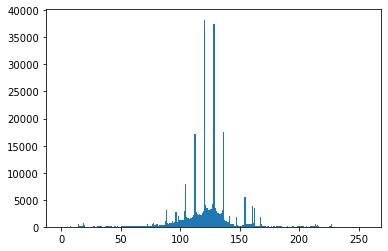

In [18]:
# histogram for the red channel
plt.hist(r_resized.ravel(),256,[0, 256]);
plt.show()

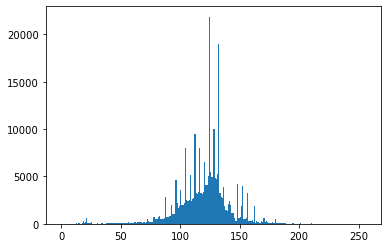

In [19]:
# histogram for the green channel
plt.hist(g_resized.ravel(),256,[0, 256]);
plt.show()

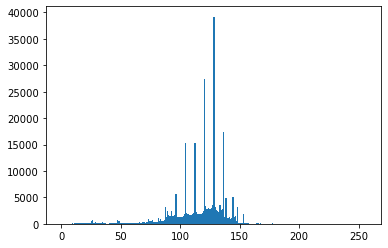

In [20]:
# histogran for the blue channel
plt.hist(b_resized.ravel(),256,[0, 256]);
plt.show()

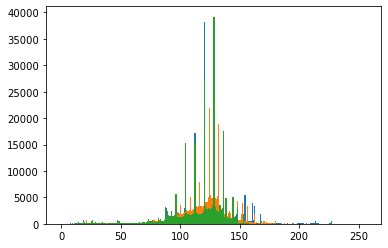

In [21]:
# plot the histogram for each channel in the same figure
plt.hist(r_resized.ravel(),256,[0, 256]);
plt.hist(g_resized.ravel(),256,[0, 256]);
plt.hist(b_resized.ravel(),256,[0, 256]);
plt.show()

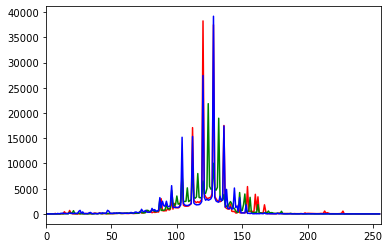

In [22]:
# plot combined histogram in one plot
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_resized],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation). This code is from a tutorial Junjie shared with the group.

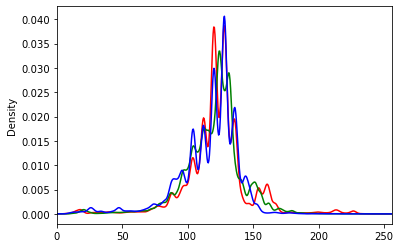

In [23]:
# plot kernel density estimate
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:, :, ix], color)
    plt.xlim([0,256])
    plt.show()
    
plot_rgb(img_resized)

## Image gradients and Edge Detection

### Let's first get the [histogram of oriented gradients](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html) (HOG) descriptor. This code is also from a tutorial Junjie shared with the group.

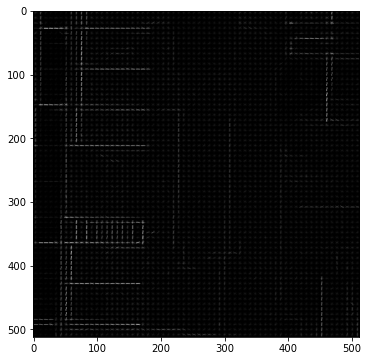

In [24]:
hog_features, hog_image = hog(img_resized,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(8, 8))

# show our hog_image with a grey colormap
plt.figure(figsize=(6,6))
plt.imshow(hog_image, cmap=mpl.cm.gray)
plt.show()

In [25]:
# get the image gradient with Laplacian Derivatives
lap = cv2.Laplacian(img_resized, cv2.CV_64F)

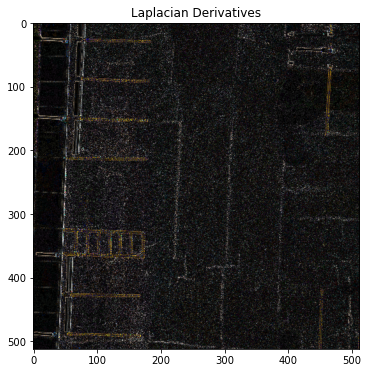

In [26]:
# plot Laplacian derivatives
plt.figure(figsize=(6,6))
lap = np.uint8(np.absolute(lap))
plt.imshow(lap)
plt.title('Laplacian Derivatives');
plt.show()

In [27]:
# get the image gradient with Sobel Derivatives
sobelx = cv2.Sobel(img_resized,cv2.CV_64F, 1, 0 )
sobely = cv2.Sobel(img_resized,cv2.CV_64F, 0, 1 )

In [28]:
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))

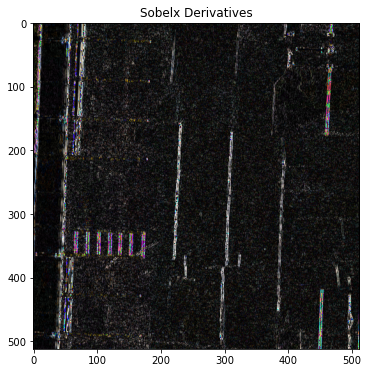

In [29]:
# plot sobelx
plt.figure(figsize=(6,6))
plt.imshow(sobelx)
plt.title('Sobelx Derivatives');
plt.show()

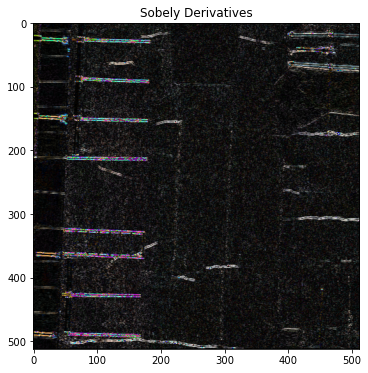

In [30]:
# plot sobely
plt.figure(figsize=(6,6))
plt.imshow(sobely)
plt.title('Sobely Derivatives');
plt.show()

In [31]:
sobelCombined = cv2.bitwise_or(sobelx,sobely)

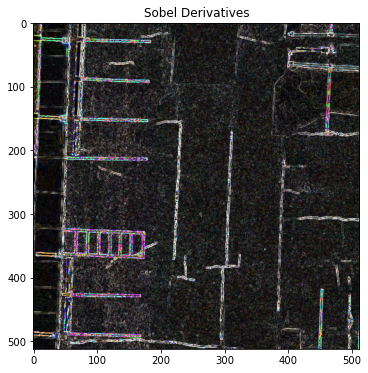

In [32]:
# combined sobel
plt.figure(figsize=(6,6))
plt.imshow(sobelCombined)
plt.title('Sobel Derivatives');
plt.show()

In [33]:
# Canny Edge Detection
canny = cv2.Canny(img_resized, 100, 200)

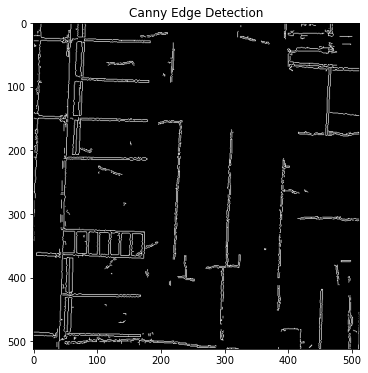

In [34]:
plt.figure(figsize=(6,6))
plt.imshow(canny, cmap = 'gray')
plt.title('Canny Edge Detection');
plt.show()

## Image Filtering and Image Smoothing

There are quite a bit noise in the image, so we do a denoising first. For details on image filtering and smoothing in OpenCV, see [here](https://docs.opencv.org/3.4.2/d4/d13/tutorial_py_filtering.html).

In [35]:
# define the kernel
kernel = np.ones((5,5),np.float32)/25

In [36]:
# 2D Convolution filtering
dst = cv2.filter2D(img_resized, -1, kernel)

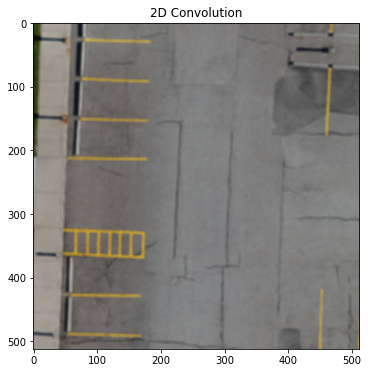

In [37]:
plt.figure(figsize=(6,6))
plt.imshow(dst)
plt.title('2D Convolution');
plt.show()

In [38]:
# Averaging Blurring
blur = cv2.blur(img_resized, (5,5))

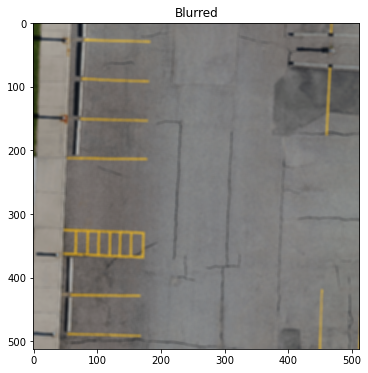

In [39]:
plt.figure(figsize=(6,6))
plt.imshow(blur)
plt.title('Blurred');
plt.show()

In [40]:
# Gaussian Blurring 
gblur = cv2.GaussianBlur(img_resized, (5,5),0)

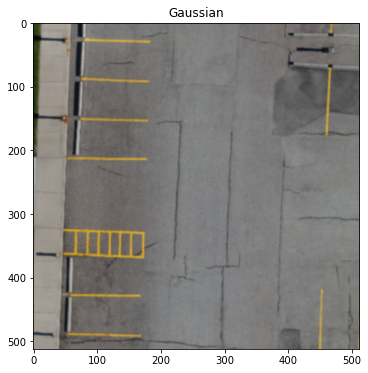

In [41]:
plt.figure(figsize=(6,6))
plt.imshow(gblur)
plt.title('Gaussian');
plt.show()

In [42]:
# Median Blurring
median = cv2.medianBlur(img_resized,5)

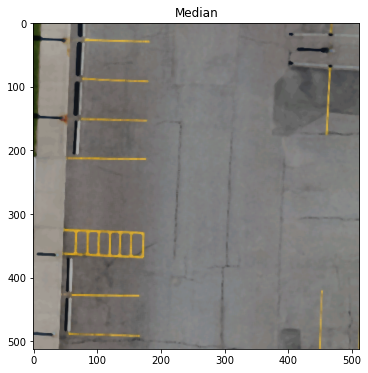

In [43]:
plt.figure(figsize=(6,6))
plt.imshow(median)
plt.title('Median');
plt.show()

In [44]:
# Bilateral Filtering
bilateralFilter = cv2.bilateralFilter(img_resized, 9, 75 ,75)

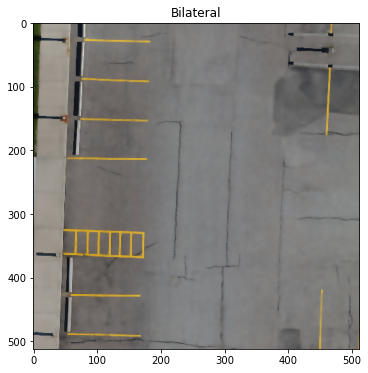

In [45]:
plt.figure(figsize=(6,6))
plt.imshow(bilateralFilter)
plt.title('Bilateral');
plt.show()

## Canny edge detection

In [46]:
# canny edge detection with min threshold value 150 and max threshold value 250
canny_bF = cv2.Canny(gblur, 150, 250)

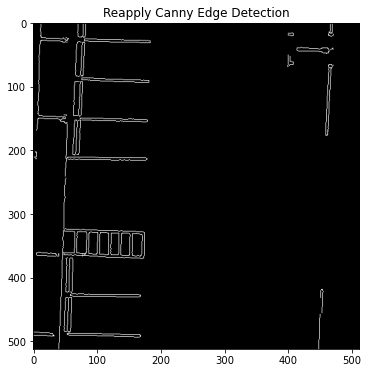

In [47]:
plt.figure(figsize=(6,6))
plt.imshow(canny_bF, cmap = 'gray')
plt.title('Reapply Canny Edge Detection');
plt.show()

We get rid of some noise there; however, there are still some random things there. Maybe should apply a color filter.  

## Hough Line Transform

In [48]:
# apply probabilistic Hough Transform to detect lines with threshold 10, minLineLength 20 and maxLineGap 10
lines = cv2.HoughLinesP(canny_bF, 1, np.pi/180, 10, minLineLength = 20, maxLineGap = 10)

In [49]:
# draw the detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]   
    cv2.line(img_resized, (x1,y1), (x2, y2), (0, 255, 0), 2)

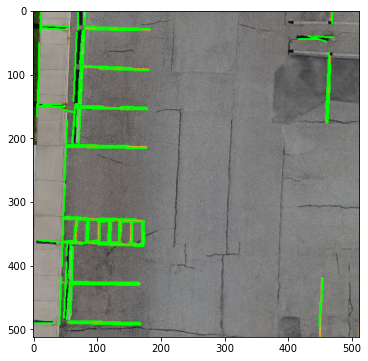

In [50]:
plt.figure(figsize=(6,6))
plt.imshow(img_resized)
plt.show()

Now we see where the lines are, so we can draw the contours over it?